<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

---

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

---

In [19]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

---

#### 1. Write a function that reproduces the example from lecture, and use it to calculate and visualize a range of situations

`def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)`

In [20]:
# First, go through one iteration by hand before writing into a function
prob_pos = 0.08
prob_pos_drunk = 1 - prob_pos
prob_drunk_prior = 1 / 1000
prob_NotThatDrunk = 1 - prob_drunk_prior

$$P(Drunk|+) = \frac{prob\_pos\_drunk \cdot prob\_drunk\_prior}{(prob\_pos\_drunk \cdot prob\_drunk\_prior) + (prob\_positive \cdot prob\_NotThatDrunk)}$$

In [21]:
(prob_pos_drunk * prob_drunk_prior) / ((prob_pos_drunk * prob_drunk_prior) + (prob_pos * (1 - prob_drunk_prior)))

0.011380504700643244

In [22]:
# Now that I have everything laid out, writing the equation into a function
def prob_drunk_given_positive(prob_drunk_prior, prob_positive):
    return (((1 - prob_positive) * prob_drunk_prior) / 
            (((1 - prob_positive) * prob_drunk_prior) + (prob_positive * (1 - prob_drunk_prior))))

In [23]:
# Test out the function, one time!
prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, prob_pos)
prob_drunk_prior

0.011380504700643244

In [24]:
# Test out the function, ten times!
prior = 1 / 1000  # Reset the prior whenever cell is run

prior_data = []

for x in range(10):
    prior = prob_drunk_given_positive(prior, prob_pos)
    prior_data.append(prior)
    
print(prior_data)

[0.011380504700643244, 0.11690607734806628, 0.6035517634803313, 0.9459680554381814, 0.9950577515521439, 0.9995682911846789, 0.9999624453001201, 0.9999967342619444, 0.999999716021931, 0.9999999753062485]


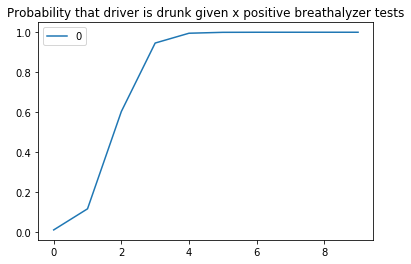

In [36]:
# Graph the probabilities
sns.lineplot(data=pd.DataFrame(prior_data));
plt.title("Probability that driver is drunk given x positive breathalyzer tests");

---

#### 2. Explore `scipy.stats.bayes_mvs`

- Read its [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html#scipy.stats.bayes_mvs)
- Experiment with it on data you've tested in other ways earlier this week

In [29]:
?stats.bayes_mvs

Signature: stats.bayes_mvs(data, alpha=0.9)
Docstring:
Bayesian confidence intervals for the mean, var, and std.

Parameters
----------
data : array_like
    Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
    Requires 2 or more data points.
alpha : float, optional
    Probability that the returned confidence interval contains
    the true parameter.

Returns
-------
mean_cntr, var_cntr, std_cntr : tuple
    The three results are for the mean, variance and standard deviation,
    respectively.  Each result is a tuple of the form::

        (center, (lower, upper))

    with `center` the mean of the conditional pdf of the value given the
    data, and `(lower, upper)` a confidence interval, centered on the
    median, containing the estimate to a probability ``alpha``.

See Also
--------
mvsdist

Notes
-----
Each tuple of mean, variance, and standard deviation estimates represent
the (center, (lower, upper)) with center the mean of the conditional pdf
of the valu

#### Experimentationalist

For this experimentation section, I'll use the `house-votes-84.data` dataset.

In [31]:
# Get the dataset from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-18 17:20:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.05s   

2019-09-18 17:20:58 (355 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [33]:
# Load the dataset into a dataframe and add column headers
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

# Replace "?" with NaN and "y" / "n" with 1 / 0 
df = df.replace({
    "?": np.NaN,
    "n": 0,
    "y": 1,
})

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


> Calculate 95% confidence interval for "education" using Bayesian approach

In [39]:
# First, can't have any null values!
# Let's count those bad boiz
df["education"].isnull().value_counts()  
# 31 abstentions, resulting in 31 NaN values
# Some senators just don't care about the kids...

False    404
True      31
Name: education, dtype: int64

In [43]:
# Create pd.Series without the absentees
# Why yes...I do like to break things up into as many steps as possible (sometimes)
edumacation = df["education"].dropna(how="any")
print(len(edumacation))  # 404: government not found. Please try again later...

404


In [45]:
mean_ci_edu, _, _ = stats.bayes_mvs(edumacation, alpha=0.95)
print(mean_ci_edu)

Mean(statistic=0.42326732673267325, minmax=(0.37488391760148726, 0.47165073586385925))


> Calculate 99% confidence interval for "duty-free" also using Bayesian approach

In [47]:
# Now to do that all in one go, because I can
# ...and I like experimentating
mean_ci_doody, _, _ = stats.bayes_mvs(df["duty-free"].dropna(), alpha=0.99)
print(mean_ci_doody)

Mean(statistic=0.4275184275184275, minmax=(0.3639768162425481, 0.49106003879430693))


> Calculate 99% Bayesian confidence interval for "education", by party

In [62]:
# Create new dataframe with party as columns - so I can loop over to create the intervals
# Ready for some hot and steamy `.melt()` action?
# I don't even need to...doesn't really make sense in this instance.
print("I just wanted to say that...")

I just wanted to say that...


In [70]:
party_education = df[["party", "education"]].dropna()  # Also just wanted to say that
party_education.head()

,party,education
0,republican,1.0
1,republican,1.0
2,democrat,0.0
3,democrat,0.0
5,democrat,0.0


In [78]:
print(type(df["duty-free"]))

<class 'pandas.core.series.Series'>


In [84]:
# Iterate through the parties, calculating the Bayesian confidence intervals for each

confidence_level = 0.99

# Group by party, then iterate over the groups
for name, group in party_education.groupby(party_education["party"]):
    mean_ci_group, _, _ = stats.bayes_mvs(group["education"], alpha=confidence_level)
    print(f"Party: {name.title()}")
    print(f"Mean: {mean_ci_group[0]}")
    print(f"{confidence_level * 100}% Confidence Interval: {mean_ci_group[1]}")
    print("")

Party: Democrat
Mean: 0.14457831325301204
99.0% Confidence Interval: (0.08661050929949306, 0.20254611720653104)

Party: Republican
Mean: 0.8709677419354839
99.0% Confidence Interval: (0.8005115457663251, 0.9414239381046426)



---

#### 3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

In [85]:
# Frequentist calculation of confidence interval

def confidence_interval(data, confidence=0.95):
    """
    Calculates a confidence interval around a sample mean for given data,
    using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data = np.array(data)  # Standardize to numpy array
    mean = np.mean(data)
    n = len(data)
    
    # Stdev divided by sqare root of n (degrees of freedom / # observations)
    stderr = np.std(data, ddof=1) / np.sqrt(n)
    # stderr = stats.sem(data)
    
    # Std error multiplied by t-statistic
    margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
    print(margin_of_error)

    return (mean, mean - margin_of_error, mean + margin_of_error)

In [92]:
# This time, I'm a Freq for confidence intervals
ci_freq = confidence_interval(edumacation)
print(ci_freq)

0.04838340913118599
(0.42326732673267325, 0.37488391760148726, 0.47165073586385925)


In [94]:
# I already hit the BAEsian, but tuple-ize it to plot it
ci_bae = tuple(mean_ci_edu)
print(ci_bae)

(0.42326732673267325, (0.37488391760148726, 0.47165073586385925))


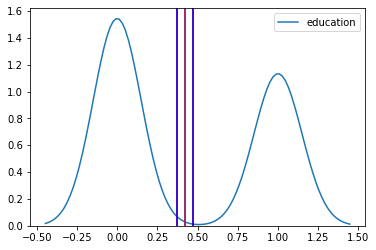

In [103]:
# Plot with seaborn kdeplot
sns.kdeplot(edumacation)

# Bayesian CI
plt.axvline(x=ci_bae[1][0], color="r");
plt.axvline(x=ci_bae[1][1], color="r");
plt.axvline(x=ci_bae[0], color="orange");

# Frequentist CI
plt.axvline(x=ci_freq[1], color="b");
plt.axvline(x=ci_freq[2], color="b");
plt.axvline(x=ci_freq[0], color="purple");

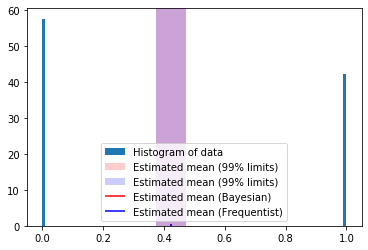

In [104]:
# Based on the plot given as an example in the `.bayes_mvs()` documentation

# Create figure and axes
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(edumacation, bins=100, density=True, label='Histogram of data')

ax.vlines(ci_bae[0], 0, 0.5, colors='r', label='Estimated mean (Bayesian)')
ax.axvspan(ci_bae[1][0],ci_bae[1][1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (99% limits)')

ax.vlines(ci_freq[0], 0, 0.5, colors='b', label='Estimated mean (Frequentist)')
ax.axvspan(ci_freq[1],ci_freq[2], facecolor='b',
           alpha=0.2, label=r'Estimated mean (99% limits)')

ax.legend(fontsize=10)
# ax.set_xlim([-4, 4])
# ax.set_ylim([0, 0.5])

plt.show()

---

#### 4. In your own words, summarize the difference between Bayesian and Frequentist statistics

Frequentist statistical inference is based on sample size, using probabilities based on large sample sizes to infer long run frequencies, and therefore expected values or results. As such, Frequentist statistics is less dependable with smaller sample sizes.

Bayesian statistics uses prior information about the question being asked to make initial inferences, representing uncertainty with probability distributions. Open collecting more data on a certain parameter, the probability distribution can be updated.